In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


df_semanal19 = pd.read_csv('informeSemanalIRA19.csv')
df_semanal18 = pd.read_csv('informeSemanalIRA18.csv')
df_semanal17 = pd.read_csv('informeSemanalIRA17.csv')
df_semanal16 = pd.read_csv('informeSemanalIRA16.csv')
df_edad = pd.read_csv('incidenciasIRA.csv')
df_contaminantes = pd.read_csv('SMCA_CMX 2019.csv')

# Limpieza De Datos

In [47]:
# Función para convertir no numéricos a NaN y calcular el promedio por hora
def preprocess_data(df):
    for col in df.columns[3:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['Promedio_Hora'] = df.iloc[:, 3:].mean(axis=1)

# Función para preparar y agrupar los datos
def group_data(df):
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
    daily_avg = df.groupby(['Fecha', 'CONTAMINANTE'])['Promedio_Hora'].mean().reset_index()
    daily_avg['Semana'] = daily_avg['Fecha'].dt.isocalendar().week
    return daily_avg.groupby(['Semana', 'CONTAMINANTE'])['Promedio_Hora'].mean().reset_index()

# Cargar datos
df_contaminantes = pd.read_csv('SMCA_CMX 2019.csv')
preprocess_data(df_contaminantes)

# Lista de contaminantes a analizar
contaminantes = ['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Procesamiento para cada contaminante
for cont in contaminantes:
    co_semanal = group_data(df_contaminantes[df_contaminantes['CONTAMINANTE'] == cont])
    print(f"Resultados para {cont}:")
    for index, row in co_semanal.iterrows():
        semana = row['Semana']
        promedio = row['Promedio_Hora']
        print(f"  Semana {semana}: Promedio = {promedio:.2f} ppm")
    print("\n")


Resultados para CO:
  Semana 1: Promedio = 0.45 ppm
  Semana 2: Promedio = 0.38 ppm
  Semana 3: Promedio = 0.35 ppm
  Semana 4: Promedio = 0.40 ppm
  Semana 5: Promedio = 0.40 ppm
  Semana 6: Promedio = 0.39 ppm
  Semana 7: Promedio = 0.36 ppm
  Semana 8: Promedio = 0.35 ppm
  Semana 9: Promedio = 0.38 ppm
  Semana 10: Promedio = 0.43 ppm


Resultados para NO2:
  Semana 1: Promedio = 28.87 ppm
  Semana 2: Promedio = 25.52 ppm
  Semana 3: Promedio = 24.01 ppm
  Semana 4: Promedio = 25.39 ppm
  Semana 5: Promedio = 26.82 ppm
  Semana 6: Promedio = 26.09 ppm
  Semana 7: Promedio = 24.36 ppm
  Semana 8: Promedio = 17.50 ppm
  Semana 9: Promedio = 24.88 ppm
  Semana 10: Promedio = 24.25 ppm
  Semana 11: Promedio = 22.19 ppm
  Semana 12: Promedio = 19.17 ppm
  Semana 13: Promedio = 22.95 ppm
  Semana 14: Promedio = 21.86 ppm
  Semana 15: Promedio = 21.19 ppm
  Semana 16: Promedio = 18.27 ppm
  Semana 17: Promedio = 24.02 ppm
  Semana 18: Promedio = 24.24 ppm
  Semana 19: Promedio = 21.22 ppm

C:\Users\i_die\AppData\Local\Temp\ipykernel_7820\1700261566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
C:\Users\i_die\AppData\Local\Temp\ipykernel_7820\1700261566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
C:\Users\i_die\AppData\Local\Temp\ipykernel_7820\1700261566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

# Analisis Descriptivo

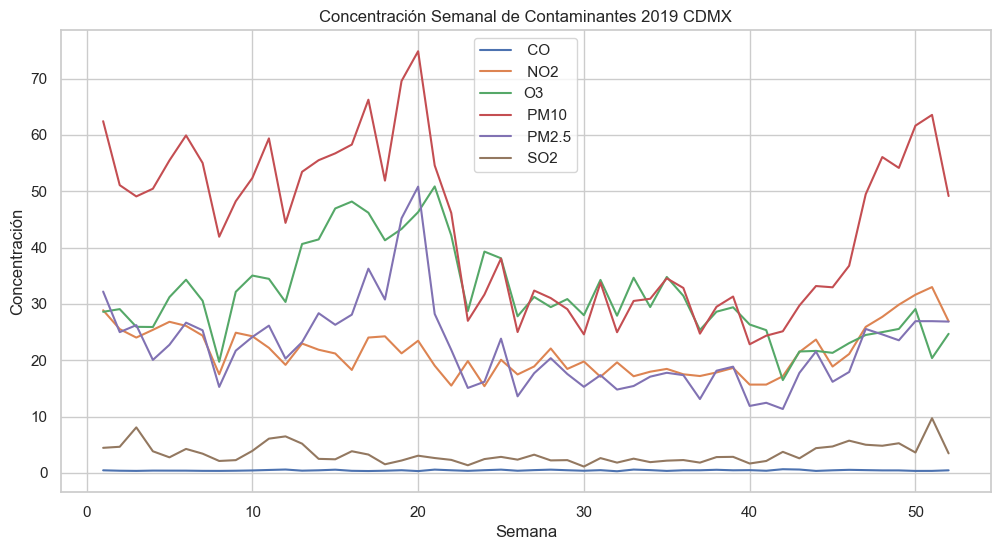

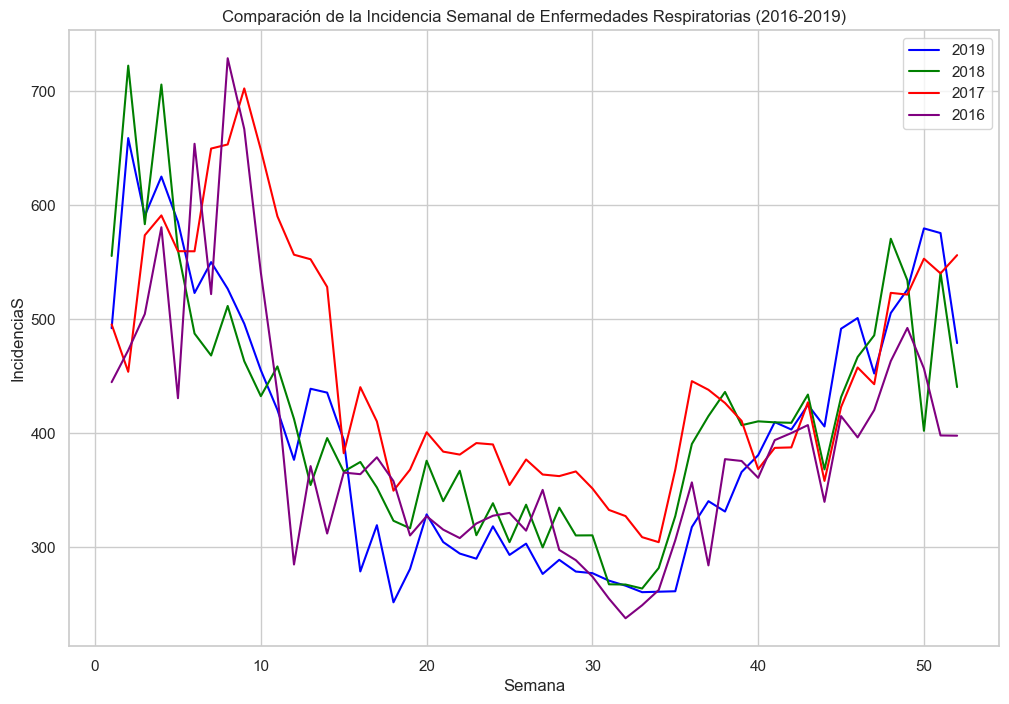

In [48]:
# Cargar los datos desde los archivos CSV
contaminantes = pd.read_csv('Contaminates_Semanal19.csv')
incidencias = pd.read_csv('informeSemanalIRA19.csv')

# Función para generar gráficos
def plot_data(df, title, ylabel, columns=None):
    """
    Función para graficar gráficos de línea para el dataframe dado.

    :param df: DataFrame que contiene los datos.
    :param title: Título del gráfico.
    :param ylabel: Etiqueta del eje Y.
    :param columns: Lista de columnas para graficar. Si es None, grafica todas las columnas excepto 'Semana'.
    """
    plt.figure(figsize=(12, 6))
    columns_to_plot = df.columns[1:] if columns is None else columns
    for col in columns_to_plot:
        sns.lineplot(data=df, x='Semana', y=col, label=col)

    plt.title(title)
    plt.xlabel('Semana')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Estableciendo el estilo para los gráficos
sns.set(style="whitegrid")

# Generando gráficos para Contaminantes
plot_data(contaminantes, 'Concentración Semanal de Contaminantes 2019 CDMX', 'Concentración')

# Generando gráficos para IncidenciaS
plt.figure(figsize=(12, 8))

# Gráfico para 2019
plt.plot(df_semanal19['Semana'], df_semanal19['IncidenciaS'], label='2019', color='blue')

# Gráfico para 2018
plt.plot(df_semanal18['Semana'], df_semanal18['IncidenciaS'], label='2018', color='green')

# Gráfico para 2017
plt.plot(df_semanal17['Semana'], df_semanal17['IncidenciaS'], label='2017', color='red')

# Gráfico para 2016
plt.plot(df_semanal16['Semana'], df_semanal16['IncidenciaS'], label='2016', color='purple')

# Añadir título y etiquetas
plt.title('Comparación de la Incidencia Semanal de Enfermedades Respiratorias (2016-2019)')
plt.xlabel('Semana')
plt.ylabel('IncidenciaS')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


# Uso de Regresion Lineal

In [49]:
# Combinar los datos en un solo DataFrame
data_combined = pd.merge(contaminantes, incidencias, on='Semana')

# Quitar espacios al principio de los nombres de las columnas
data_combined.columns = data_combined.columns.str.strip()

# Preparar el modelo de regresión lineal
model = LinearRegression()

# Crear un DataFrame vacío para almacenar los resultados de las correlaciones
correlation_results = pd.DataFrame(columns=['Contaminante', 'Coeficiente', 'Intercepto', 'C. de Determinación'])

# Realizar la regresión lineal para cada contaminante
for i, contaminant in enumerate(['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']):
    # Preparar los datos
    X = data_combined[[contaminant]].values.reshape(-1, 1)
    y = data_combined['IncidenciaS'].values.reshape(-1, 1)

    # Entrenar el modelo
    model.fit(X, y)

    # Obtener los resultados
    coeficiente = model.coef_[0][0]
    intercepto = model.intercept_[0]
    r_squared = model.score(X, y)

    # Almacenar los resultados
    correlation_results.loc[i] = [contaminant, coeficiente, intercepto, r_squared]

# Ordenar y mostrar los resultados
correlation_results.sort_values(by='C. de Determinación', ascending=False)


,Contaminante,Coeficiente,Intercepto,C. de Determinación
1,NO2,17.933788,11.918773,0.452836
5,SO2,40.190476,262.803738,0.347760
2,O3,-6.135567,592.379447,0.184280
3,PM10,3.360813,252.541732,0.173150
0,CO,-303.529560,533.325561,0.050867
4,PM2.5,1.693067,361.397133,0.012797


# Visualizacion de Datos

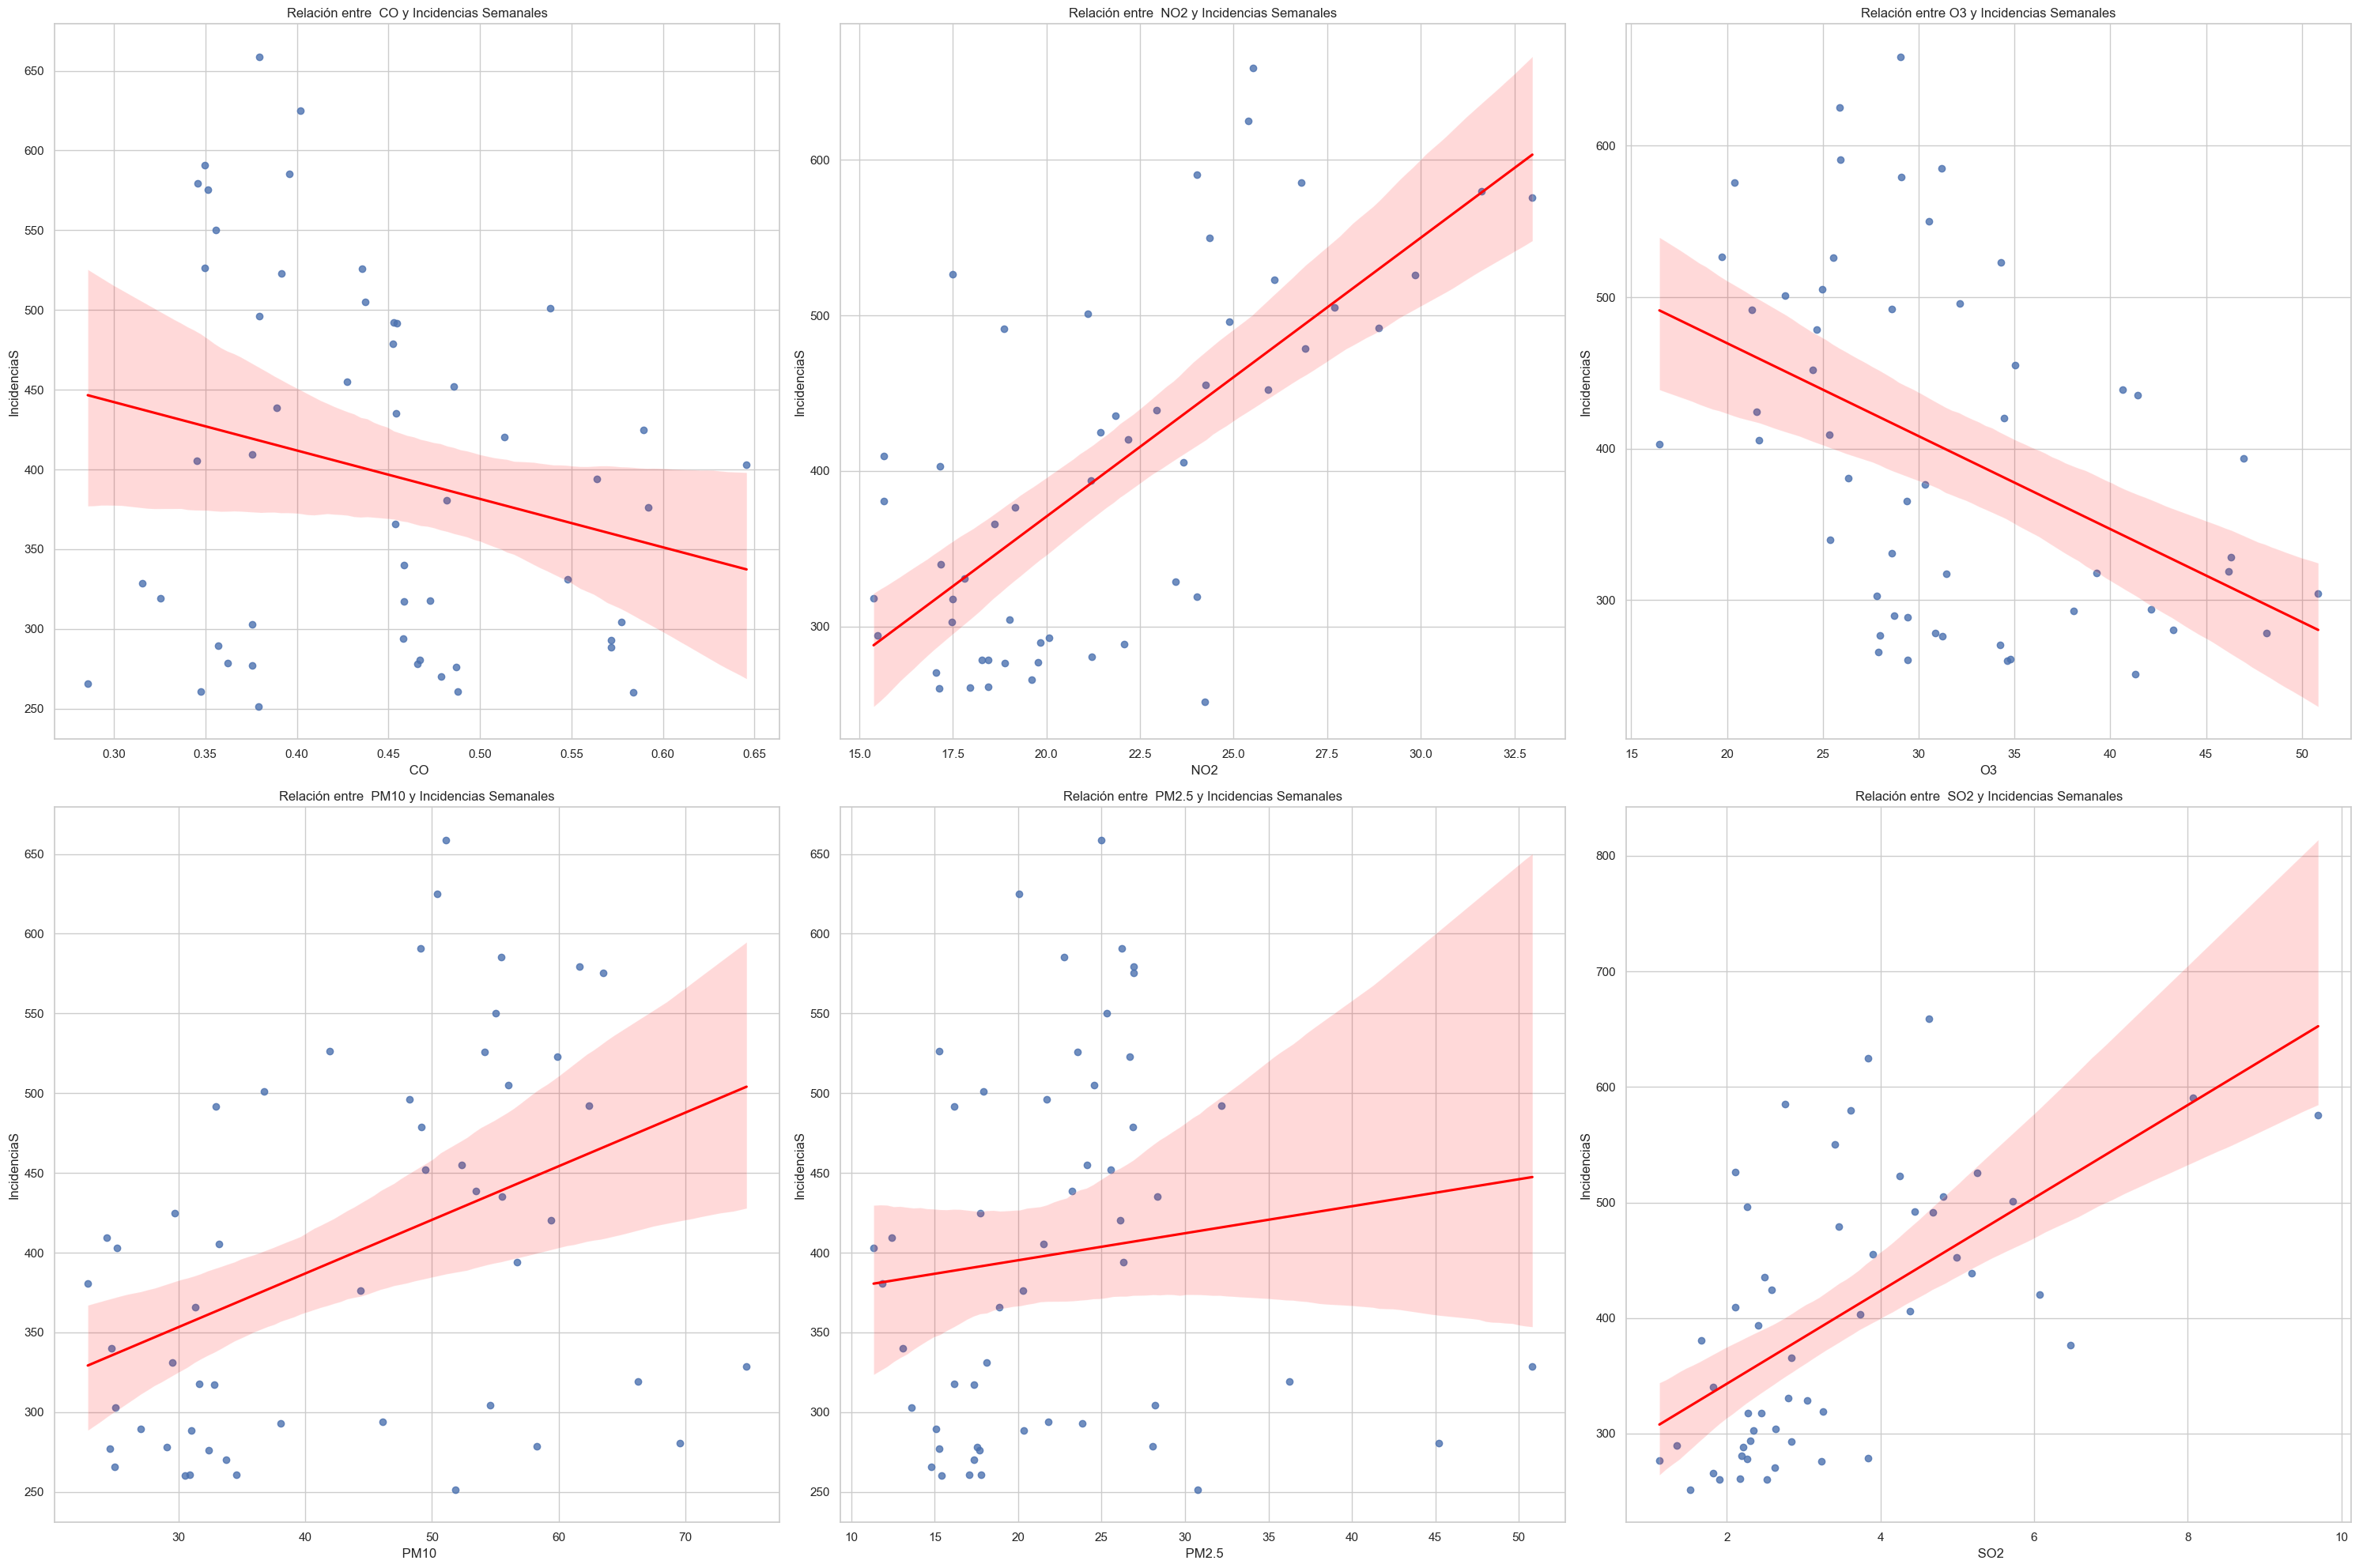

In [50]:
# Uniendo los dos dataframes en la columna 'Semana'
merged_df = pd.merge(contaminantes, incidencias, on='Semana')


# Ajustando el tamaño de los gráficos individuales para una mejor visualización
plt.figure(figsize=(30, 20))

# Creando gráficos individuales para cada contaminante
for i, contaminante in enumerate(merged_df.columns[1:-1], 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=contaminante, y='IncidenciaS', data=merged_df, line_kws={'color':'red'})
    plt.title(f'Relación entre {contaminante} y Incidencias Semanales')
    plt.tight_layout()

plt.show()
